In [145]:
#Importing dependencies 
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import numpy as np
from datetime import datetime, date, time
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency


In [2]:
#reading in files
filepath = os.path.join(".", "Resources", "Crash_Data.csv")
df = pd.read_csv(filepath, low_memory=False)
pop_filepath = os.path.join(".", "Resources", "Population data.xlsx")
df_pop = pd.read_excel(pop_filepath, sheet_name = "Data1")



## Analysing Data

### Crash dataset

In [3]:
pd.set_option("display.max_columns", 0)

In [4]:
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110,Pedestrian,Female,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,NaN,Passenger,Male,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,NaN,Driver,Male,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,60,Passenger,Female,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [5]:
df.shape


(52843, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

Duplicate Crash IDs indicate more than 1 person was killed in that particular crash. 

In [7]:
df["Crash ID"].nunique()

47567

In [8]:
duplicate = df[df.duplicated(["Crash ID"])]
len(duplicate)

5276

In [9]:
## Change in data collection over the time period

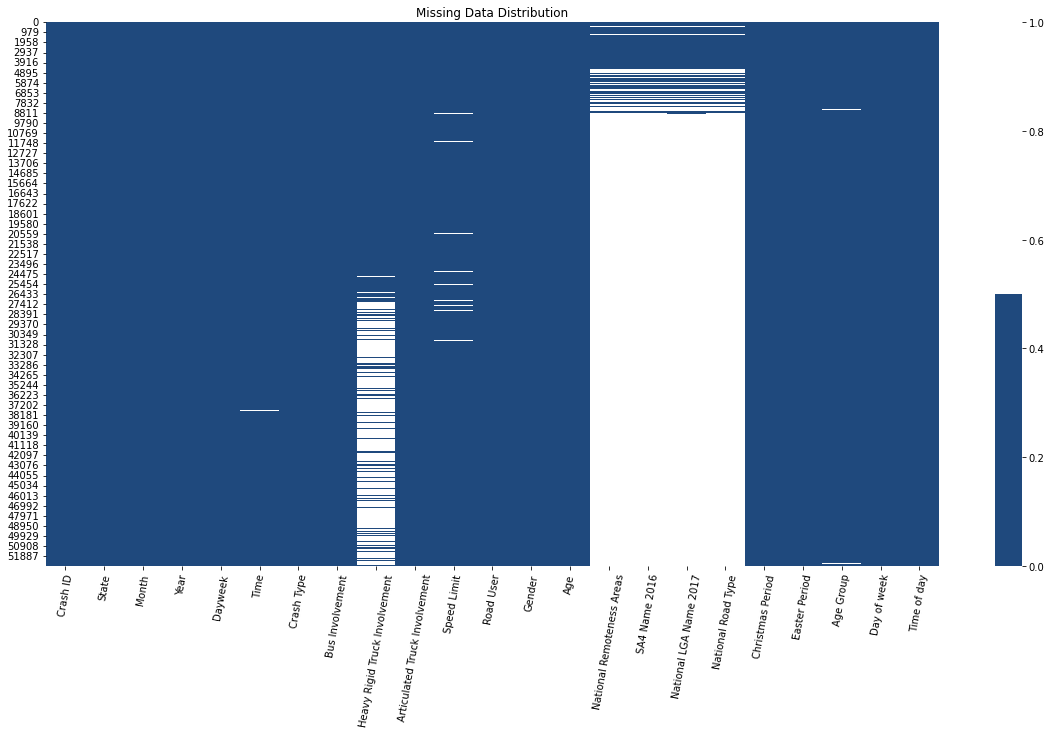

In [10]:
fig, ax = plt.subplots(figsize=(20,10))     
cols = df.columns 
colours = ['#1f497d', '#ffffff'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
ax.set_xticklabels(ax.get_xticklabels(),rotation =80)
ax.set_title("Missing Data Distribution")

plt.show()

In [11]:
#percentage of data missing per column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"{col} - {round(pct_missing*100)}")

Crash ID - 0
State - 0
Month - 0
Year - 0
Dayweek - 0
Time - 0
Crash Type - 0
Bus Involvement - 0
Heavy Rigid Truck Involvement - 39
Articulated Truck Involvement - 0
Speed Limit - 1
Road User - 0
Gender - 0
Age - 0
National Remoteness Areas - 87
SA4 Name 2016 - 87
National LGA Name 2017 - 87
National Road Type - 87
Christmas Period - 0
Easter Period - 0
Age Group - 0
Day of week - 0
Time of day - 0


### Population Dataset

In [12]:
df_pop.head(10)

,Unnamed: 0,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,Estimated Resident Population ; Female ; New South Wales ;,Estimated Resident Population ; Female ; Victoria ;,Estimated Resident Population ; Female ; Queensland ;,Estimated Resident Population ; Female ; South Australia ;,Estimated Resident Population ; Female ; Western Australia ;,Estimated Resident Population ; Female ; Tasmania ;,Estimated Resident Population ; Female ; Northern Territory ;,Estimated Resident Population ; Female ; Australian Capital Territory ;,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;
0,Unit,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
2,Data Type,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE
3,Frequency,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter
4,Collection Month,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5,Series Start,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00,1981-06-01 00:00:00
6,Series End,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00
7,No. Obs,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
8,Series ID,A2060825C,A2060826F,A2060827J,A2060828K,A2060829L,A2060830W,A2060831X,

In [13]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 28 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Unnamed: 0                                                                  170 non-null    object
 1   Estimated Resident Population ;  Male ;  New South Wales ;                  170 non-null    object
 2   Estimated Resident Population ;  Male ;  Victoria ;                         170 non-null    object
 3   Estimated Resident Population ;  Male ;  Queensland ;                       170 non-null    object
 4   Estimated Resident Population ;  Male ;  South Australia ;                  170 non-null    object
 5   Estimated Resident Population ;  Male ;  Western Australia ;                170 non-null    object
 6   Estimated Resident Population ;  Male ;  Tasmania ;       

## Cleaning Data

Cleaning the data from the crash dataset:



In [14]:
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110,Pedestrian,Female,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,NaN,Passenger,Male,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,NaN,Driver,Male,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,60,Passenger,Female,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [16]:
#replace NaN values with ''
df.fillna('', inplace=True)
df = df.drop('Time of day', 1)

#convert time from object to datetime to time 
df["Time"] = df["Time"].astype('datetime64[ns]')
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
df['Time'] = df['Time'].dt.time

/var/folders/7s/svlqv50x5_n70mx5t9gbqz500000gn/T/ipykernel_32419/2016201112.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Time of day', 1)


In [17]:
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week
0,20212133,Vic,9,2021,Sunday,00:30:00,Single,,,,,Motorcycle rider,Male,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend
1,20214022,SA,9,2021,Saturday,23:31:00,Multiple,No,No,No,110,Pedestrian,Female,28,Major Cities of Australia,Adelaide - North,Playford (C),,No,No,26_to_39,Weekend
2,20212096,Vic,9,2021,Saturday,23:00:00,Single,,,,,Passenger,Male,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend
3,20212145,Vic,9,2021,Saturday,22:25:00,Single,,,,,Driver,Male,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend
4,20212075,Vic,9,2021,Saturday,05:15:00,Single,,,,,Motorcycle rider,Male,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05:00,Single,Yes,,No,60,Passenger,Female,5,,,,,No,No,0_to_16,Weekday
52839,19895088,WA,1,1989,Monday,06:00:00,Single,No,,No,110,Passenger,Male,19,,,,,Yes,No,17_to_25,Weekday
52840,19895088,WA,1,1989,Monday,06:00:00,Single,No,,No,110,Passenger,Male,17,,,,,Yes,No,17_to_25,Weekday
52841,19895088,WA,1,1989,Monday,06:00:00,Single,No,,No,110,Passenger,Male,17,,,,,Yes,No,17_to_25,Weekday


In [18]:
#Set up quarters to match reporting periods for population data
df.loc[(df.Month >= 1) & (df.Month <= 3), 'Quarter'] = "Q1"
df.loc[(df.Month >= 4) & (df.Month <= 6), 'Quarter'] = "Q2"
df.loc[(df.Month >= 7) & (df.Month <= 9), 'Quarter'] = "Q3"
df.loc[(df.Month >= 10) & (df.Month <= 12), 'Quarter'] = "Q4"


df.loc[(df["Time"] >= time(6, 0)) & (df["Time"] < time(10,0)), "Time of Day"] = "Morning Commute (6am - 10am)"
df.loc[(df["Time"] >= time(10, 0)) & (df["Time"] < time(15,0)), "Time of Day"] = "Daytime (10am - 3pm)"
df.loc[(df["Time"] >= time(15, 0)) & (df["Time"] < time(19,0)), "Time of Day"] = "Evening Commute (3pm - 7pm)"
df.loc[(df["Time"] >= time(19, 0)) & (df["Time"] < time(23,0)), "Time of Day"] = "Late Evening (7pm - 11pm)"
df.loc[(df["Time"] >= time(23, 0)) & (df["Time"] <= time(23,59)) | 
       (df["Time"] >= time(0, 0)) & (df["Time"] < time(6,0)) |
       (df["Time"].astype(str) == "NaT"), "Time of Day"] = "Night (12pm - 6am)"


df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Quarter,Time of Day
0,20212133,Vic,9,2021,Sunday,00:30:00,Single,,,,,Motorcycle rider,Male,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Q3,Night (12pm - 6am)
1,20214022,SA,9,2021,Saturday,23:31:00,Multiple,No,No,No,110,Pedestrian,Female,28,Major Cities of Australia,Adelaide - North,Playford (C),,No,No,26_to_39,Weekend,Q3,Night (12pm - 6am)
2,20212096,Vic,9,2021,Saturday,23:00:00,Single,,,,,Passenger,Male,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Q3,Night (12pm - 6am)
3,20212145,Vic,9,2021,Saturday,22:25:00,Single,,,,,Driver,Male,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Q3,Late Evening (7pm - 11pm)
4,20212075,Vic,9,2021,Saturday,05:15:00,Single,,,,,Motorcycle rider,Male,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Q3,Night (12pm - 6am)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05:00,Single,Yes,,No,60,Passenger,Female,5,,,,,No,No,0_to_16,Weekday,Q1,Evening Commute (3pm - 7pm)
52839,19895088,WA,1,1989,Monday,06:00:00,Single,No,,No,110,Passenger,Male,19,,,,,Yes,No,17_to_25,Weekday,Q1,Morning Commute (6am - 10am)
52840,19895088,WA,1,1989,Monday,06:00:00,Single,No,,No,110,Passenger,Male,17,,,,,Yes,No,17_to_25,Weekday,Q1,Morning Commute (6am - 10am)
52841,19895088,WA,1,1989,Monday,06:00:00,Single,No,,No,110,Passenger,Male,17,,,,,Yes,No,17_to_25,Weekday,Q1,Morning Commute (6am - 10am)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52843 non-null  object
 8   Heavy Rigid Truck Involvement  52843 non-null  object
 9   Articulated Truck Involvement  52843 non-null  object
 10  Speed Limit                    52843 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52843 non-null  object
 13  A

Cleaning the population dataset:

In [20]:
#removing superfluous rows 
df_pop = df_pop.iloc[9:, :]
df_pop = df_pop.apply(pd.to_numeric, errors='ignore')


In [21]:
df_pop

,Unnamed: 0,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,Estimated Resident Population ; Female ; New South Wales ;,Estimated Resident Population ; Female ; Victoria ;,Estimated Resident Population ; Female ; Queensland ;,Estimated Resident Population ; Female ; South Australia ;,Estimated Resident Population ; Female ; Western Australia ;,Estimated Resident Population ; Female ; Tasmania ;,Estimated Resident Population ; Female ; Northern Territory ;,Estimated Resident Population ; Female ; Australian Capital Territory ;,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;
9,1981-06-01,2608351,1958717,1178447,653940,657249,212565,65393,113605,7448267,2626538,1988200,1166761,664829,642807,214659,57223,113976,7474993,5234889,3946917,2345208,1318769,1300056,427224,122616,227581,14923260
10,1981-09-01,2616060,1964139,1189946,655136,663047,212862,66716,114215,7482121,2633395,1993194,1177531,666099,648237,215063,58470,114567,7506556,5249455,3957333,2367477,1321235,1311284,427925,125186,228782,14988677
11,1981-12-01,2624579,1969349,1200504,657014,667381,212935,68023,114554,7514339,2642315,1999049,1187439,668162,652840,215348,59695,114930,7539778,5266894,3968398,2387943,1325176,1320221,428283,127718,229484,15054117
12,1982-03-01,2634534,1975617,1210128,658840,672273,213477,69023,115374,7549266,2651585,2005209,1196227,669830,657427,215968,60570,115616,7572432,5286119,3980826,2406355,1328670,1329700,429445,129593,230990,15121698
13,1982-06-01,2643527,1981619,1219369,660066,676892,213679,69388,116374,7580914,2660053,2011251,1205217,671042,662007,216166,60926,116671,7603333,5303580,3992870,2424586,1331108,1338899,429845,130314,233045,15184247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-06-01,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,4115308,3379920,2618629,896774,1335968,273306,119947,218321,12960329,8167024,6693858,5175245,1770277,2664212,540536,246235,431213,25693267
166,2020-09-01,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,4113184,3370934,2622546,896781,1337866,273289,120133,218067,12954964,8162613,6675626,5182750,1770249,2667361,540644,246457,430763,25681149
167,2020-12-01,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,4116688,3362276,2627767,897014,1339740,273456,120189,218401,12957695,8168294,6657917,5193404,1770467,2670646,540970,246280,431020,25683688
168,2021-03-01,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,4120046,3357890,2634453,897698,1342862,273827,120360,218650,12967953,8175379,6649441,5206878,1771952,2676777,541609,246580,431606,25704917


In [22]:
df_pop.columns

Index(['Unnamed: 0',
       'Estimated Resident Population ;  Male ;  New South Wales ;',
       'Estimated Resident Population ;  Male ;  Victoria ;',
       'Estimated Resident Population ;  Male ;  Queensland ;',
       'Estimated Resident Population ;  Male ;  South Australia ;',
       'Estimated Resident Population ;  Male ;  Western Australia ;',
       'Estimated Resident Population ;  Male ;  Tasmania ;',
       'Estimated Resident Population ;  Male ;  Northern Territory ;',
       'Estimated Resident Population ;  Male ;  Australian Capital Territory ;',
       'Estimated Resident Population ;  Male ;  Australia ;',
       'Estimated Resident Population ;  Female ;  New South Wales ;',
       'Estimated Resident Population ;  Female ;  Victoria ;',
       'Estimated Resident Population ;  Female ;  Queensland ;',
       'Estimated Resident Population ;  Female ;  South Australia ;',
       'Estimated Resident Population ;  Female ;  Western Australia ;',
       'Estimated Re

In [23]:
#Make column names more meaningful and easier to read

df_pop = df_pop.rename(columns = {'Unnamed: 0': 'Date',
                                 'Estimated Resident Population ;  Male ;  New South Wales ;':  "NSW - Male", 
                                'Estimated Resident Population ;  Male ;  Victoria ;': "Vic - Male",
                                'Estimated Resident Population ;  Male ;  Queensland ;': "QLD - Male",
                                'Estimated Resident Population ;  Male ;  South Australia ;': "SA - Male",
                                'Estimated Resident Population ;  Male ;  Western Australia ;': "WA - Male",
                                'Estimated Resident Population ;  Male ;  Tasmania ;': "Tas - Male",
                                'Estimated Resident Population ;  Male ;  Northern Territory ;': "NT - Male",
                                'Estimated Resident Population ;  Male ;  Australian Capital Territory ;': "ACT - Male",
                                'Estimated Resident Population ;  Male ;  Australia ;': "AUS - Male",
                                'Estimated Resident Population ;  Female ;  New South Wales ;':  "NSW - Female",
                                'Estimated Resident Population ;  Female ;  Victoria ;': "Vic - Female",
                                'Estimated Resident Population ;  Female ;  Queensland ;': "QLD - Female",
                                'Estimated Resident Population ;  Female ;  South Australia ;': "SA - Female",
                                'Estimated Resident Population ;  Female ;  Western Australia ;': "WA - Female",
                                'Estimated Resident Population ;  Female ;  Tasmania ;': "Tas - Female",
                                'Estimated Resident Population ;  Female ;  Northern Territory ;': "NT - Female",
                                'Estimated Resident Population ;  Female ;  Australian Capital Territory ;': "ACT - Female",
                                'Estimated Resident Population ;  Female ;  Australia ;': "AUS - Female",
                                'Estimated Resident Population ;  Persons ;  New South Wales ;': "NSW - All",
                                'Estimated Resident Population ;  Persons ;  Victoria ;': "Vic - All",
                                'Estimated Resident Population ;  Persons ;  Queensland ;': "QLD - All",
                                'Estimated Resident Population ;  Persons ;  South Australia ;': "SA - All",
                                'Estimated Resident Population ;  Persons ;  Western Australia ;': "WA - All",
                                'Estimated Resident Population ;  Persons ;  Tasmania ;': "Tas - All",
                                'Estimated Resident Population ;  Persons ;  Northern Territory ;': "NT - All",
                                'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;': "ACT - All",
                                'Estimated Resident Population ;  Persons ;  Australia ;': "AUS - All",
                                 
                                 })
#Parse the month and year into new columns and drop old date column
df_pop["Month"] = df_pop["Date"].astype(str).str.split("-")
df_pop['Month'] = df_pop["Date"].astype(str).str[5:7]
df_pop["Year"] = df_pop["Date"].astype(str).str[:4]
df_pop = df_pop.drop("Date",axis = 1)



In [24]:
#Return Month and Year back to int 
df_pop["Month"] = df_pop["Month"].astype(int)
df_pop["Year"] = df_pop["Year"].astype(int)

In [25]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 9 to 169
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   NSW - Male    161 non-null    int64
 1   Vic - Male    161 non-null    int64
 2   QLD - Male    161 non-null    int64
 3   SA - Male     161 non-null    int64
 4   WA - Male     161 non-null    int64
 5   Tas - Male    161 non-null    int64
 6   NT - Male     161 non-null    int64
 7   ACT - Male    161 non-null    int64
 8   AUS - Male    161 non-null    int64
 9   NSW - Female  161 non-null    int64
 10  Vic - Female  161 non-null    int64
 11  QLD - Female  161 non-null    int64
 12  SA - Female   161 non-null    int64
 13  WA - Female   161 non-null    int64
 14  Tas - Female  161 non-null    int64
 15  NT - Female   161 non-null    int64
 16  ACT - Female  161 non-null    int64
 17  AUS - Female  161 non-null    int64
 18  NSW - All     161 non-null    int64
 19  Vic - All     161 non-null   

In [27]:
#Reset the Index
df_pop.reset_index(drop = True, inplace = True)
df_pop

,NSW - Male,Vic - Male,QLD - Male,SA - Male,WA - Male,Tas - Male,NT - Male,ACT - Male,AUS - Male,NSW - Female,Vic - Female,QLD - Female,SA - Female,WA - Female,Tas - Female,NT - Female,ACT - Female,AUS - Female,NSW - All,Vic - All,QLD - All,SA - All,WA - All,Tas - All,NT - All,ACT - All,AUS - All,Month,Year
0,2608351,1958717,1178447,653940,657249,212565,65393,113605,7448267,2626538,1988200,1166761,664829,642807,214659,57223,113976,7474993,5234889,3946917,2345208,1318769,1300056,427224,122616,227581,14923260,6,1981
1,2616060,1964139,1189946,655136,663047,212862,66716,114215,7482121,2633395,1993194,1177531,666099,648237,215063,58470,114567,7506556,5249455,3957333,2367477,1321235,1311284,427925,125186,228782,14988677,9,1981
2,2624579,1969349,1200504,657014,667381,212935,68023,114554,7514339,2642315,1999049,1187439,668162,652840,215348,59695,114930,7539778,5266894,3968398,2387943,1325176,1320221,428283,127718,229484,15054117,12,1981
3,2634534,1975617,1210128,658840,672273,213477,69023,115374,7549266,2651585,2005209,1196227,669830,657427,215968,60570,115616,7572432,5286119,3980826,2406355,1328670,1329700,429445,129593,230990,15121698,3,1982
4,2643527,1981619,1219369,660066,676892,213679,69388,116374,7580914,2660053,2011251,1205217,671042,662007,216166,60926,116671,7603333,5303580,3992870,2424586,1331108,1338899,429845,130314,233045,15184247,6,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,4115308,3379920,2618629,896774,1335968,273306,119947,218321,12960329,8167024,6693858,5175245,1770277,2664212,540536,246235,431213,25693267,6,2020
157,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,4113184,3370934,2622546,896781,1337866,273289,120133,218067,12954964,8162613,6675626,5182750,1770249,2667361,540644,246457,430763,25681149,9,2020
158,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,4116688,3362276,2627767,897014,1339740,273456,120189,218401,12957695,8168294,6657917,5193404,1770467,2670646,540970,246280,431020,25683688,12,2020
159,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,4120046,3357890,2634453,897698,1342862,273827,120360,218650,12967953,8175379,6649441,5206878,1771952,2676777,541609,246580,431606,25704917,3,2021


In [28]:
#Create a column for quarter to later merge with crash data frame
df_pop.loc[(df_pop.Month >= 1) & (df_pop.Month <= 3), 'Quarter'] = "Q1"
df_pop.loc[(df_pop.Month >= 4) & (df_pop.Month <= 6), 'Quarter'] = "Q2"
df_pop.loc[(df_pop.Month >= 7) & (df_pop.Month <= 9), 'Quarter'] = "Q3"
df_pop.loc[(df_pop.Month >= 10) & (df_pop.Month <= 12), 'Quarter'] = "Q4"

In [29]:
df_pop

,NSW - Male,Vic - Male,QLD - Male,SA - Male,WA - Male,Tas - Male,NT - Male,ACT - Male,AUS - Male,NSW - Female,Vic - Female,QLD - Female,SA - Female,WA - Female,Tas - Female,NT - Female,ACT - Female,AUS - Female,NSW - All,Vic - All,QLD - All,SA - All,WA - All,Tas - All,NT - All,ACT - All,AUS - All,Month,Year,Quarter
0,2608351,1958717,1178447,653940,657249,212565,65393,113605,7448267,2626538,1988200,1166761,664829,642807,214659,57223,113976,7474993,5234889,3946917,2345208,1318769,1300056,427224,122616,227581,14923260,6,1981,Q2
1,2616060,1964139,1189946,655136,663047,212862,66716,114215,7482121,2633395,1993194,1177531,666099,648237,215063,58470,114567,7506556,5249455,3957333,2367477,1321235,1311284,427925,125186,228782,14988677,9,1981,Q3
2,2624579,1969349,1200504,657014,667381,212935,68023,114554,7514339,2642315,1999049,1187439,668162,652840,215348,59695,114930,7539778,5266894,3968398,2387943,1325176,1320221,428283,127718,229484,15054117,12,1981,Q4
3,2634534,1975617,1210128,658840,672273,213477,69023,115374,7549266,2651585,2005209,1196227,669830,657427,215968,60570,115616,7572432,5286119,3980826,2406355,1328670,1329700,429445,129593,230990,15121698,3,1982,Q1
4,2643527,1981619,1219369,660066,676892,213679,69388,116374,7580914,2660053,2011251,1205217,671042,662007,216166,60926,116671,7603333,5303580,3992870,2424586,1331108,1338899,429845,130314,233045,15184247,6,1982,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,4115308,3379920,2618629,896774,1335968,273306,119947,218321,12960329,8167024,6693858,5175245,1770277,2664212,540536,246235,431213,25693267,6,2020,Q2
157,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,4113184,3370934,2622546,896781,1337866,273289,120133,218067,12954964,8162613,6675626,5182750,1770249,2667361,540644,246457,430763,25681149,9,2020,Q3
158,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,4116688,3362276,2627767,897014,1339740,273456,120189,218401,12957695,8168294,6657917,5193404,1770467,2670646,540970,246280,431020,25683688,12,2020,Q4
159,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,4120046,3357890,2634453,897698,1342862,273827,120360,218650,12967953,8175379,6649441,5206878,1771952,2676777,541609,246580,431606,25704917,3,2021,Q1


In [30]:
#Create new dataframes for each state, add a new column with the state, 
#then reset the column names so they are the same for consolidating into a new dataframe 

nsw = df_pop[["Quarter", "Month", "Year", "NSW - Male", "NSW - Female", "NSW - All"]]
nsw.insert(0, 'State', 'NSW')
nsw.columns = [x.replace("NSW - ", "") for x in nsw.columns]

tas = df_pop[["Quarter", "Month", "Year", "Tas - Male", "Tas - Female", "Tas - All"]]
tas.insert(0, 'State', 'Tas')
tas.columns = [x.replace("Tas - ", "") for x in tas.columns]

vic = df_pop[["Quarter", "Month", "Year", "Vic - Male", "Vic - Female", "Vic - All"]]
vic.insert(0, 'State', 'Vic')
vic.columns = [x.replace("Vic - ", "") for x in vic.columns]

qld = df_pop[["Quarter", "Month", "Year", "QLD - Male", "QLD - Female", "QLD - All"]]
qld.insert(0, 'State', 'Qld')
qld.columns = [x.replace("QLD - ", "") for x in qld.columns]

sa = df_pop[["Quarter", "Month", "Year", "SA - Male", "SA - Female", "SA - All"]]
sa.insert(0, 'State', 'SA')
sa.columns = [x.replace("SA - ", "") for x in sa.columns]

wa = df_pop[["Quarter", "Month", "Year", "WA - Male", "WA - Female", "WA - All"]]
wa.insert(0, 'State', 'WA')
wa.columns = [x.replace("WA - ", "") for x in wa.columns]

nt = df_pop[["Quarter", "Month", "Year", "NT - Male", "NT - Female", "NT - All"]]
nt.insert(0, 'State', 'NT')
nt.columns = [x.replace("NT - ", "") for x in nt.columns]

act = df_pop[["Quarter", "Month", "Year", "ACT - Male", "ACT - Female", "ACT - All"]]
act.insert(0, 'State', 'ACT')
act.columns = [x.replace("ACT - ", "") for x in act.columns]

In [31]:
#Consolidating state dfs into one population df
state_pop = tas.append([vic, nsw, nt, act, wa, qld, sa])
state_pop

,State,Quarter,Month,Year,Male,Female,All
0,Tas,Q2,6,1981,212565,214659,427224
1,Tas,Q3,9,1981,212862,215063,427925
2,Tas,Q4,12,1981,212935,215348,428283
3,Tas,Q1,3,1982,213477,215968,429445
4,Tas,Q2,6,1982,213679,216166,429845
...,...,...,...,...,...,...,...
156,SA,Q2,6,2020,873503,896774,1770277
157,SA,Q3,9,2020,873468,896781,1770249
158,SA,Q4,12,2020,873453,897014,1770467
159,SA,Q1,3,2021,874254,897698,1771952


In [32]:
state_pop
state_pop["State"].value_counts()

Tas    161
Vic    161
NSW    161
NT     161
ACT    161
WA     161
Qld    161
SA     161
Name: State, dtype: int64

In [33]:
#merging crash dataframe with population dataframe and renaming month column to a meaningful name 
#Joining inner so population data since 7 2021 is dropped as thre is no corresponding crash data for that period.

main_df = pd.merge(df, state_pop,  how='inner', on=['State', 'Year', 'Quarter'])
main_df = main_df.rename(columns={"Month_x": "Crash Month",
                                  "Month_y": "Population Month",
                                  "Dayweek" : "Day of Week"
                                 })

main_df



,Crash ID,State,Crash Month,Year,Day of Week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Quarter,Time of Day,Population Month,Male,Female,All
0,20212045,Vic,6,2021,Monday,05:40:00,Single,No,No,No,100,Driver,Male,36,Inner Regional Australia,Latrobe - Gippsland,Baw Baw (S),Local Road,No,No,26_to_39,Weekend,Q2,Night (12pm - 6am),6,3291572,3357587,6649159
1,20212082,Vic,6,2021,Sunday,14:00:00,Single,No,No,No,80,Motorcycle rider,Male,63,Outer Regional Australia,Warrnambool and South West,Glenelg (S),Sub-arterial Road,No,No,40_to_64,Weekend,Q2,Daytime (10am - 3pm),6,3291572,3357587,6649159
2,20212079,Vic,6,2021,Saturday,13:25:00,Single,No,No,No,80,Driver,Female,67,Major Cities of Australia,Mornington Peninsula,Mornington Peninsula (S),National or State Highway,No,No,65_to_74,Weekend,Q2,Daytime (10am - 3pm),6,3291572,3357587,6649159
3,20212111,Vic,6,2021,Thursday,16:50:00,Single,No,No,No,80,Driver,Female,50,Outer Regional Australia,Warrnambool and South West,Glenelg (S),National or State Highway,No,No,40_to_64,Weekday,Q2,Evening Commute (3pm - 7pm),6,3291572,3357587,6649159
4,20212149,Vic,6,2021,Wednesday,14:38:00,Multiple,No,No,No,50,Driver,Male,25,Major Cities of Australia,Melbourne - North West,Hume (C),Local Road,No,No,17_to_25,Weekday,Q2,Daytime (10am - 3pm),6,3291572,3357587,6649159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52561,19897020,NT,3,1989,Saturday,02:16:00,Single,No,,No,60,Pedestrian,Male,23,,,,,No,No,17_to_25,Weekend,Q1,Night (12pm - 6am),3,84763,76287,161050
52562,19897054,NT,2,1989,Saturday,18:00:00,Single,No,,No,-9,Passenger,Male,20,,,,,No,No,17_to_25,Weekend,Q1,Evening Commute (3pm - 7pm),3,84763,76287,161050
52563,19897054,NT,2,1989,Saturday,18:00:00,Single,No,,No,-9,Driver,Male,18,,,,,No,No,17_to_25,Weekend,Q1,Evening Commute (3pm - 7pm),3,84763,76287,161050
52564,19897038,NT,1,1989,Saturday,23:30:00,Single,No,,Yes,-9,Passenger,Female,31,,,,,No,No,26_to_39,Weekend,Q1,Night (12pm - 6am),3,84763,76287,161050


In [34]:
#reset index
main_df.reset_index(drop = True, inplace = True)

In [35]:
main_df.columns

Index(['Crash ID', 'State', 'Crash Month', 'Year', 'Day of Week', 'Time',
       'Crash Type', 'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Quarter', 'Time of Day',
       'Population Month', 'Male', 'Female', 'All'],
      dtype='object')

In [36]:
# creating CSV for team members
main_df.to_csv('./Resources/clean_crash_population.csv', index=False)

## Summary Stats

In [37]:
#Set total number of fatalities
total_fatalities = "{:,}".format(len(main_df))

#Set the total number of accidents
individual_accidents = "{:,}".format(len(main_df["Crash ID"].unique()))

sex = (((main_df.Gender) == "Female").value_counts([0])*100).tolist()
female = round(sex[1])
male = round(sex[0])
avg_age = round(((main_df["Age"]).mean()),0)
avg_speed_limit = round(pd.to_numeric(main_df["Speed Limit"], errors="coerce").mean(), 0)


road_user = ((main_df["Road User"]).value_counts())
driver = round(road_user[0].astype('float')/len(main_df) * 100, 2)
passenger = round(road_user[1].astype('float')/len(main_df) * 100, 2)
pedestrian = round(road_user[2].astype('float')/len(main_df) * 100, 2)
motorcycle_rider = round(road_user[3].astype('float')/len(main_df) * 100, 2)
pedal_cyclist = round(road_user[4].astype('float')/len(main_df) * 100, 2)
motorcycle_passenger = round(road_user[5].astype('float')/len(main_df) * 100, 2)


# women_pct = women/total_fatalities


summary_df = pd.DataFrame([[individual_accidents, total_fatalities, female, male, avg_age, avg_speed_limit]], 
                         columns=['Number of Accidents', 'Total Fatalities', '% Female', '% Male' , "Average Age", "Average Speed Limit" ])

road_user = pd.DataFrame([[driver, passenger, pedestrian, 
                            motorcycle_rider, pedal_cyclist, motorcycle_passenger ]],
                        columns = ['% Driver', '% Passenger',
                                 '% Pedestrian' , '% Motorcycle Rider', '% Pedal Cyclist', 
                                  '% Motorcycle Passenger'])
road_user

,% Driver,% Passenger,% Pedestrian,% Motorcycle Rider,% Pedal Cyclist,% Motorcycle Passenger
0,45.06,23.23,15.62,12.55,2.69,0.69


In [38]:
summary_df

,Number of Accidents,Total Fatalities,% Female,% Male,Average Age,Average Speed Limit
0,"47,322","52,566",28,72,40.0,82.0


In [39]:
main_df["Road User"].unique()

array(['Driver', 'Motorcycle rider', 'Passenger', 'Pedal cyclist',
       'Pedestrian', 'Other/-9', 'Motorcycle pillion passenger'],
      dtype=object)

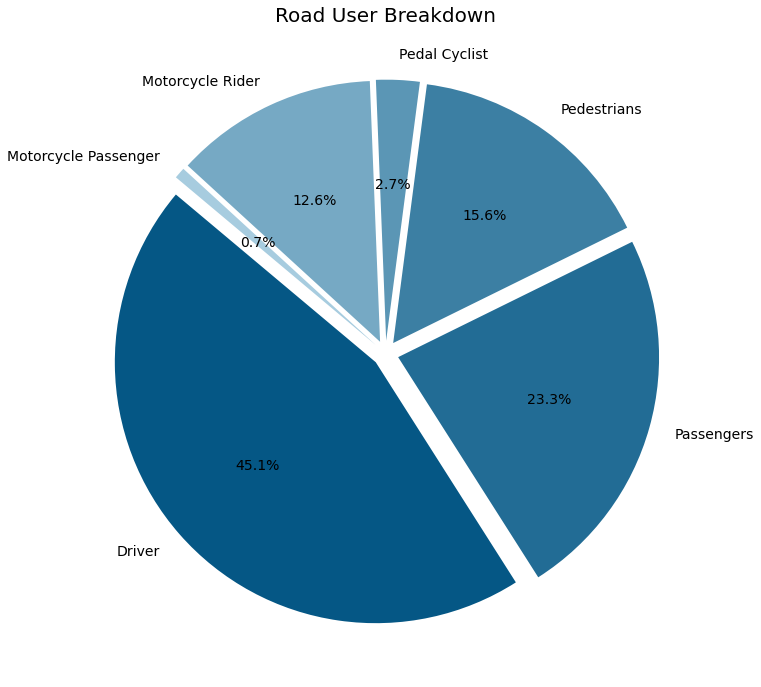

In [42]:
# Labels for the sections of our pie chart
labels = ["Driver", "Passengers", "Pedestrians","Pedal Cyclist", "Motorcycle Rider","Motorcycle Passenger"  ]

# The values of each section of the pie chart
sizes = [driver, passenger, pedestrian,pedal_cyclist, motorcycle_rider, motorcycle_passenger,   ]

# The colors of each section of the pie chart
colors = ["#055785", "#226C95", "#3C7FA3", "#5B96B5", "#76A9C4", "#A7CCDF"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title("Road User Breakdown", fontdict = {'fontsize' : 20})
plt.pie(sizes, explode = explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=False, startangle=140, textprops={'fontsize': 14} )
plt.show();

fig.savefig('road_user_breakdown.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [41]:
summary_df

,Number of Accidents,Total Fatalities,% Female,% Male,Average Age,Average Speed Limit
0,"47,322","52,566",28,72,40.0,82.0


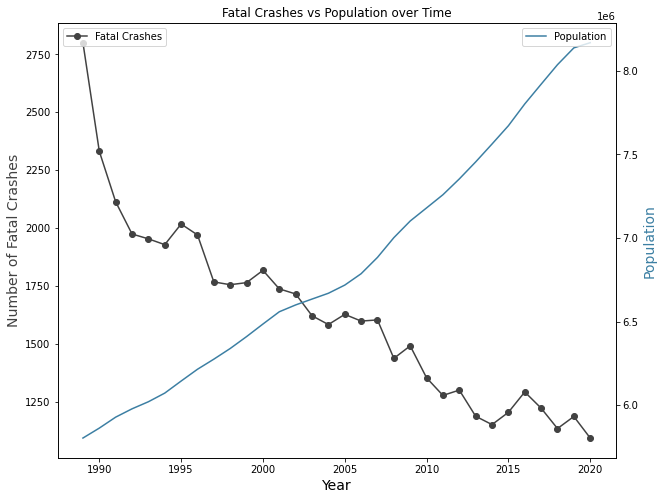

The correlation between time and fatality rate is -0.92 for Australia.


In [43]:
#Australia

main_df = main_df.loc[main_df.Year != 2021]
year_group = main_df.groupby(main_df['Year'])

crash_by_year = year_group["Crash ID"].count()
pop_by_year = year_group["All"].max()

x_axis = main_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time")
ax.plot(x_axis, crash_by_year, color="#424242", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis label
ax.set_ylabel("Number of Fatal Crashes", color="#424242", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, pop_by_year, color="#3C7FA3")
ax2.set_ylabel("Population", color="#3C7FA3",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()
correlation = stats.pearsonr(crash_by_year, pop_by_year)
print(f"The correlation between time and fatality rate is {round(correlation[0],2)} for Australia.")

fig.savefig('fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

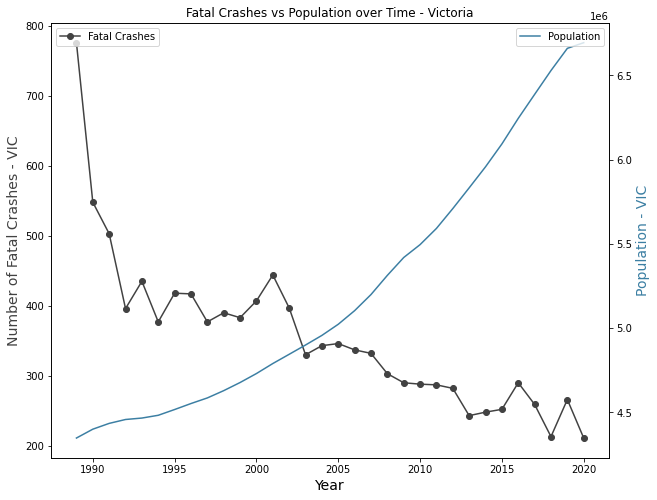

The correlation between time and fatality rate is -0.77 for Victoria.


In [44]:
# Victoria

vic_df = main_df.loc[main_df.State == "Vic"]
vic_year_group = vic_df.groupby(vic_df['Year'])

crash_vic_year_group = vic_year_group["Crash ID"].count()
vic_pop_by_year = vic_year_group["All"].max()

x_axis = vic_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time - Victoria")
ax.plot(x_axis, crash_vic_year_group, color="#424242", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis label
ax.set_ylabel("Number of Fatal Crashes - VIC", color="#424242", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, vic_pop_by_year, color="#3C7FA3")
ax2.set_ylabel("Population - VIC", color="#3C7FA3",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()
correlation = stats.pearsonr(crash_vic_year_group, vic_pop_by_year)
print(f"The correlation between time and fatality rate is {round(correlation[0],2)} for Victoria.")

fig.savefig('vic_fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [ ]:
# NSW

nsw_df = main_df.loc[main_df.State == "NSW"]
nsw_year_group = nsw_df.groupby(nsw_df['Year'])

crash_nsw_year_group = nsw_year_group["Crash ID"].count()
nsw_pop_by_year =nsw_year_group["All"].max()

x_axis = nsw_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time - NSW")
ax.plot(x_axis, crash_nsw_year_group, color="#424242", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis label
ax.set_ylabel("Number of Fatal Crashes - NSW", color="#424242", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, nsw_pop_by_year, color="#3C7FA3")
ax2.set_ylabel("Population - NSW", color="#3C7FA3",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()
correlation = stats.pearsonr(crash_nsw_year_group, nsw_pop_by_year)
print(f"The correlation between time and fatality rate is {round(correlation[0],2)} for NSW.")

fig.savefig('nsw_fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


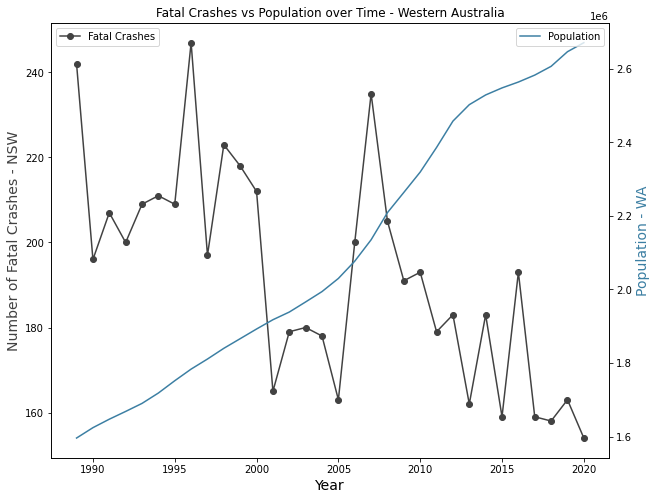

The correlation between time and fatality rate is -0.67 for Western Australia.


In [45]:
# WA

wa_df = main_df.loc[main_df.State == "WA"]
wa_year_group = wa_df.groupby(wa_df['Year'])

crash_wa_year_group = wa_year_group["Crash ID"].count()
wa_pop_by_year =wa_year_group["All"].max()

x_axis = wa_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time - Western Australia")
ax.plot(x_axis, crash_wa_year_group, color="#424242", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis label
ax.set_ylabel("Number of Fatal Crashes - NSW", color="#424242", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, wa_pop_by_year, color="#3C7FA3")
ax2.set_ylabel("Population - WA", color="#3C7FA3",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()
correlation = stats.pearsonr(crash_wa_year_group, wa_pop_by_year)
print(f"The correlation between time and fatality rate is {round(correlation[0],2)} for Western Australia.")

fig.savefig('wa_fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [ ]:
# SA

sa_df = main_df.loc[main_df.State == "SA"]
sa_year_group = sa_df.groupby(sa_df['Year'])

crash_sa_year_group = sa_year_group["Crash ID"].count()
sa_pop_by_year =sa_year_group["All"].max()

x_axis = sa_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time - South Australia")
ax.plot(x_axis, crash_sa_year_group, color="#424242", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis label
ax.set_ylabel("Number of Fatal Crashes - SA", color="#424242", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, sa_pop_by_year, color="#3C7FA3")
ax2.set_ylabel("Population - SA", color="#3C7FA3",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()
correlation = stats.pearsonr(crash_sa_year_group, sa_pop_by_year)
print(f"The correlation between time and fatality rate is {round(correlation[0],2)} for South Australia.")

fig.savefig('wa_fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


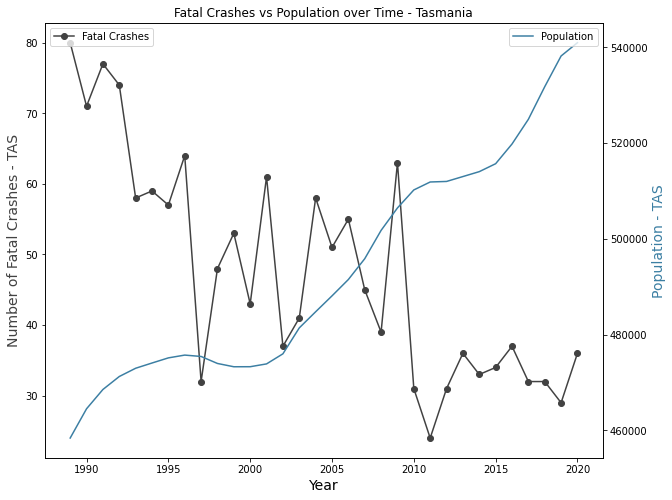

The correlation between time and fatality rate is -0.74 for Tasmania.


In [46]:
# TAS

tas_df = main_df.loc[main_df.State == "Tas"]
tas_year_group = tas_df.groupby(tas_df['Year'])

crash_tas_year_group = tas_year_group["Crash ID"].count()
tas_pop_by_year =tas_year_group["All"].max()

x_axis = tas_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time - Tasmania")
ax.plot(x_axis, crash_tas_year_group, color="#424242", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis label
ax.set_ylabel("Number of Fatal Crashes - TAS", color="#424242", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, tas_pop_by_year, color="#3C7FA3")
ax2.set_ylabel("Population - TAS", color="#3C7FA3",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()
correlation = stats.pearsonr(crash_tas_year_group, tas_pop_by_year)
print(f"The correlation between time and fatality rate is {round(correlation[0],2)} for Tasmania.")

fig.savefig('tas_fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [ ]:
# Queensland

qld_df = main_df.loc[main_df.State == "Qld"]
qld_year_group = qld_df.groupby(qld_df['Year'])

crash_qld_year_group = qld_year_group["Crash ID"].count()
qld_pop_by_year =qld_year_group["All"].max()

x_axis = qld_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time - Queensland")
ax.plot(x_axis, crash_qld_year_group, color="#424242", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis 
ax.set_ylabel("Number of Fatal Crashes - QLD", color="#424242", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, qld_pop_by_year, color="#3C7FA3")
ax2.set_ylabel("Population - QLD", color="#3C7FA3",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()
correlation = stats.pearsonr(crash_qld_year_group, qld_pop_by_year)
print(f"The correlation between time and fatality rate is {round(correlation[0],2)} for Queensland.")

fig.savefig('qld_fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


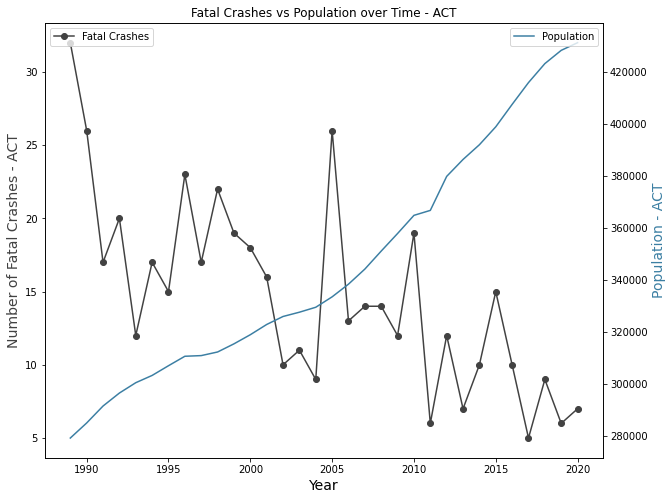

The correlation between time and fatality rate is -0.71 for ACT.


In [47]:
# ACT

act_df = main_df.loc[main_df.State == "ACT"]
act_year_group = act_df.groupby(act_df['Year'])

crash_act_year_group = act_year_group["Crash ID"].count()
act_pop_by_year =act_year_group["All"].max()

x_axis = act_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time - ACT")
ax.plot(x_axis, crash_act_year_group, color="#424242", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis 
ax.set_ylabel("Number of Fatal Crashes - ACT", color="#424242", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, act_pop_by_year, color="#3C7FA3")
ax2.set_ylabel("Population - ACT", color="#3C7FA3",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()
correlation = stats.pearsonr(crash_act_year_group, act_pop_by_year)
print(f"The correlation between time and fatality rate is {round(correlation[0],2)} for ACT.")

fig.savefig('act_fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


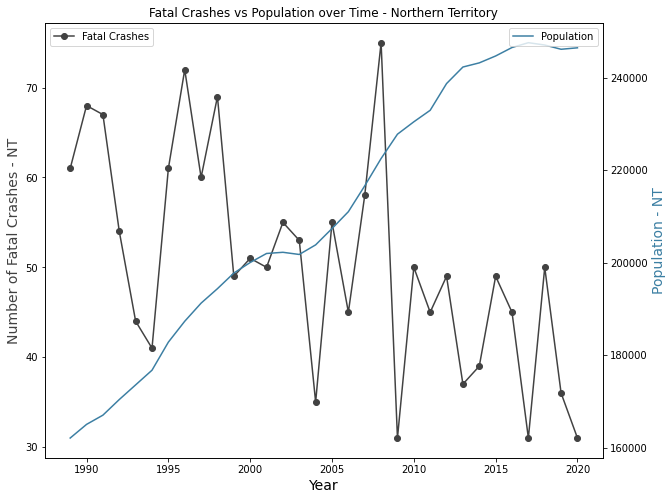

The correlation between time and fatality rate is -0.57 for Northern Territory.


In [48]:
# NT

nt_df = main_df.loc[main_df.State == "NT"]
nt_year_group = nt_df.groupby(nt_df['Year'])

crash_nt_year_group = nt_year_group["Crash ID"].count()
nt_pop_by_year =nt_year_group["All"].max()

x_axis = nt_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time - Northern Territory")
ax.plot(x_axis, crash_nt_year_group, color="#424242", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis 
ax.set_ylabel("Number of Fatal Crashes - NT", color="#424242", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, nt_pop_by_year, color="#3C7FA3")
ax2.set_ylabel("Population - NT", color="#3C7FA3",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()
correlation = stats.pearsonr(crash_nt_year_group, nt_pop_by_year)
print(f"The correlation between time and fatality rate is {round(correlation[0],2)} for Northern Territory.")

fig.savefig('nt_fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [97]:
month_group = main_df.groupby(main_df["Crash Month"])
crash_by_month = month_group["Crash ID"].count()
year_group = main_df.groupby(main_df["Year"])
year_month = year_group["Crash Month"].value_counts()
year_dow = year_group["Day of Week"].value_counts()

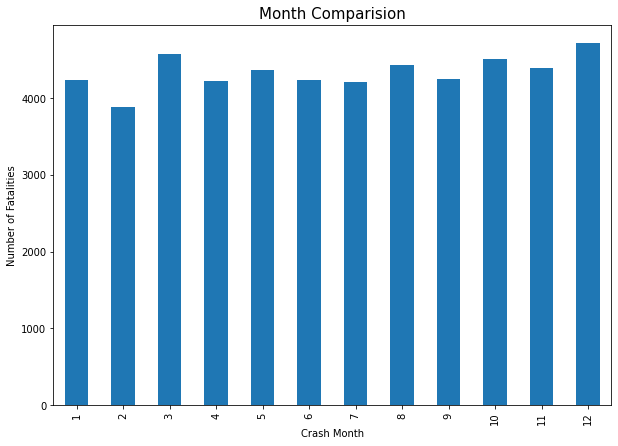

In [95]:
plt.title('Month Comparision', fontsize = 15)
plt.ylabel('Number of Fatalities')
crash_by_month.plot.bar(figsize = (10,7));
fig.savefig('month_comparison_bar_chart.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [57]:
#setting up dataframe to analyse months

jan = []
feb = []
mar = []
apr = []
may = []
jun = []
jul = []
aug = []
sep = []
octo = []
nov = []
dec = []


for i in range(1989,2021):
    jan.append(year_month[i][1])
    feb.append(year_month[i][2])
    mar.append(year_month[i][3])
    apr.append(year_month[i][4])
    may.append(year_month[i][5])
    jun.append(year_month[i][6])
    jul.append(year_month[i][7])
    aug.append(year_month[i][8])
    sep.append(year_month[i][9])
    octo.append(year_month[i][10])
    nov.append(year_month[i][11])
    dec.append(year_month[i][12])



In [58]:
january = pd.DataFrame({"January": jan})
february = pd.DataFrame({"February": feb})
march = pd.DataFrame({"March": mar})
april = pd.DataFrame({"April": apr})
may = pd.DataFrame({"May": may})
june = pd.DataFrame({"June": jun})
july = pd.DataFrame({"July": jul})
august = pd.DataFrame({"August": aug})
september = pd.DataFrame({"September": sep})
october = pd.DataFrame({"October": octo})
november = pd.DataFrame({"November": nov})
december = pd.DataFrame({"December": dec})


In [59]:
january_df = january[["January"]]
january_df.insert(0, 'Month', 'january')
january_df = january_df.rename({"January" : "Count"}, axis=1)

february_df = february[["February"]]
february_df.insert(0, 'Month', 'february')
february_df = february_df.rename({"February" : "Count"}, axis=1)

march_df = march[["March"]]
march_df.insert(0, 'Month', 'march')
march_df = march_df.rename({"March" : "Count"}, axis=1)

april_df = april[["April"]]
april_df.insert(0, 'Month', 'april')
april_df = april_df.rename({"April" : "Count"}, axis=1)

may_df = may[["May"]]
may_df.insert(0, 'Month', 'may')
may_df = may_df.rename({"May" : "Count"}, axis=1)

june_df = june[["June"]]
june_df.insert(0, 'Month', 'june')
june_df = june_df.rename({"June" : "Count"}, axis=1)

july_df = july[["July"]]
july_df.insert(0, 'Month', 'july')
july_df = july_df.rename({"July" : "Count"}, axis=1)

august_df = august[["August"]]
august_df.insert(0, 'Month', 'august')
august_df = august_df.rename({"August" : "Count"}, axis=1)

september_df = september[["September"]]
september_df.insert(0, 'Month', 'september')
september_df = september_df.rename({"September" : "Count"}, axis=1)

october_df = october[["October"]]
october_df.insert(0, 'Month', 'october')
october_df = october_df.rename({"October" : "Count"}, axis=1)

november_df = november[["November"]]
november_df.insert(0, 'Month', 'november')
november_df = november_df.rename({"November" : "Count"}, axis=1)
                                                        
              
december_df =december[["December"]]
december_df.insert(0, 'Month', 'december')
december_df = december_df.rename({"December" : "Count"}, axis=1)


              
              
month_df = january_df.append([february_df, march_df, april_df, may_df, june_df, july_df, august_df, september_df, october_df, november_df, december_df])


In [77]:
december_df

,Month,Count
0,december,307
1,december,223
2,december,190
3,december,177
4,december,196
5,december,169
6,december,181
7,december,166
8,december,159
9,december,157


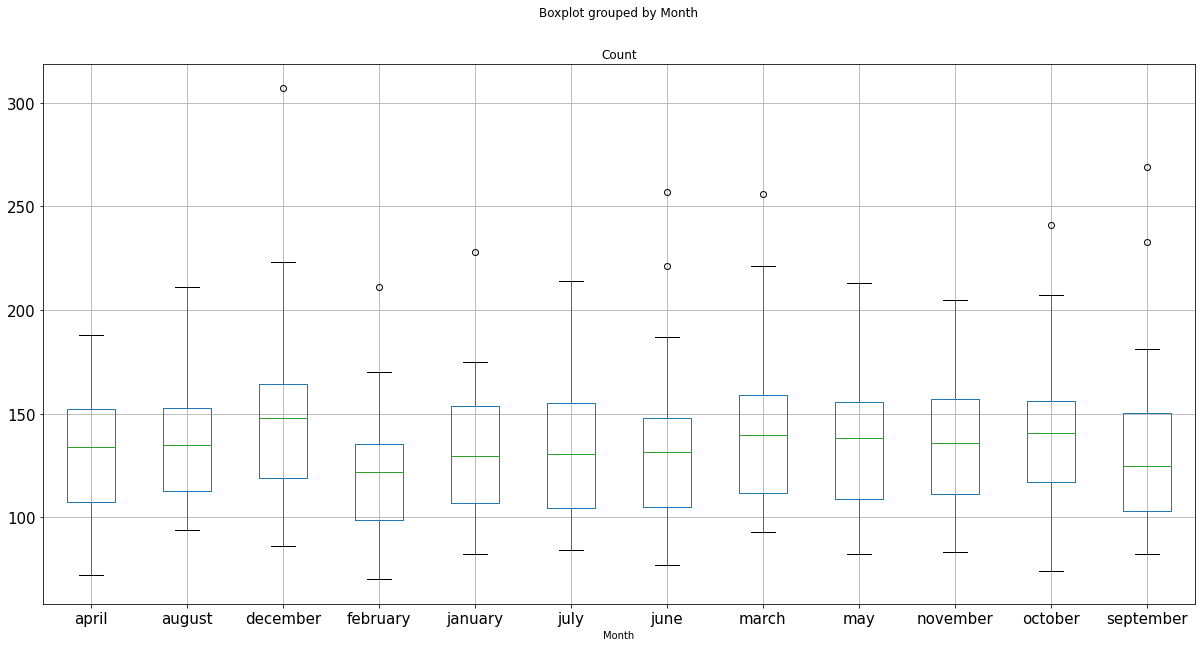

In [62]:
month_df.boxplot("Count", by="Month", figsize=(20, 10), fontsize = 15);
fig.savefig('month_boxplot.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [63]:
#running anova
stats.f_oneway(january, february, march, april, may, june, july, august, september, october, november, december)

F_onewayResult(statistic=array([1.17946449]), pvalue=array([0.29948876]))

In [64]:
day_of_week_group = main_df.groupby(main_df["Day of Week"])
crash_by_dow = day_of_week_group["Crash ID"].count()

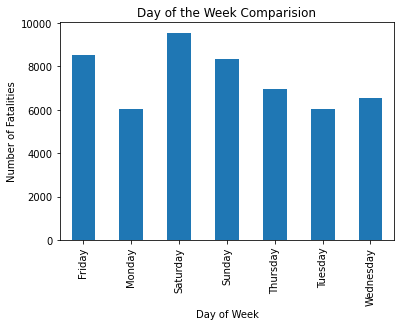

In [65]:
plt.title('Day of the Week Comparision')
plt.ylabel('Number of Fatalities')
plt.xlabel("Day of the Week")
crash_by_dow.plot.bar();

In [93]:
year_dow

Year  Day of Week
1989  Friday         519
      Saturday       498
      Sunday         447
      Thursday       360
      Wednesday      336
                    ... 
2020  Friday         165
      Wednesday      154
      Thursday       136
      Tuesday        130
      Monday         129
Name: Day of Week, Length: 224, dtype: int64

In [79]:
#creating day of week dataframe for further analysis
monday = []
tuesday = []
wednesday = []
thursday = []
friday = []
saturday = []
sunday = []

for i in range(1989,2021):
    monday.append(year_dow[i]["Monday"])
    tuesday.append(year_dow[i]["Tuesday"])
    wednesday.append(year_dow[i]["Wednesday"])
    thursday.append(year_dow[i]["Thursday"])
    friday.append(year_dow[i]["Friday"])
    saturday.append(year_dow[i]["Saturday"])
    sunday.append(year_dow[i]["Sunday"])

monday = pd.DataFrame({"Monday": monday})
tuesday = pd.DataFrame({"Tuesday": tuesday})
wednesday = pd.DataFrame({"Wednesday": wednesday})
thursday = pd.DataFrame({"Thursday": thursday})
friday = pd.DataFrame({"Friday": friday})
saturday = pd.DataFrame({"Saturday": saturday})
sunday = pd.DataFrame({"Sunday": sunday})

In [80]:
monday_df = monday[["Monday"]]
monday_df.insert(0, 'Day', 'monday')
monday_df = monday_df.rename({"Monday" : "Count"}, axis=1)

tuesday_df = tuesday[["Tuesday"]]
tuesday_df.insert(0, 'Day', 'tuesday')
tuesday_df = tuesday_df.rename({"Tuesday" : "Count"}, axis=1)

wednesday_df = wednesday[["Wednesday"]]
wednesday_df.insert(0, 'Day', 'wednesday')
wednesday_df = wednesday_df.rename({"Wednesday" : "Count"}, axis=1)

thursday_df = thursday[["Thursday"]]
thursday_df.insert(0, 'Day', 'thursday')
thursday_df = thursday_df.rename({"Thursday" : "Count"}, axis=1)
                                                                   
friday_df =friday[["Friday"]]
friday_df.insert(0, 'Day', 'friday')
friday_df = friday_df.rename({"Friday" : "Count"}, axis=1)

saturday_df =saturday[["Saturday"]]
saturday_df.insert(0, 'Day', 'saturday')
saturday_df = saturday_df.rename({"Saturday" : "Count"}, axis=1)

sunday_df =sunday[["Sunday"]]
sunday_df.insert(0, 'Day', 'sunday')
sunday_df = sunday_df.rename({"Sunday" : "Count"}, axis=1)

In [82]:
weekday_df = monday_df.append([tuesday_df, wednesday_df, thursday_df, friday_df, saturday_df, sunday_df])

In [83]:
weekday_df

,Day,Count
0,monday,330
1,monday,293
2,monday,225
3,monday,229
4,monday,194
...,...,...
27,sunday,198
28,sunday,196
29,sunday,191
30,sunday,178


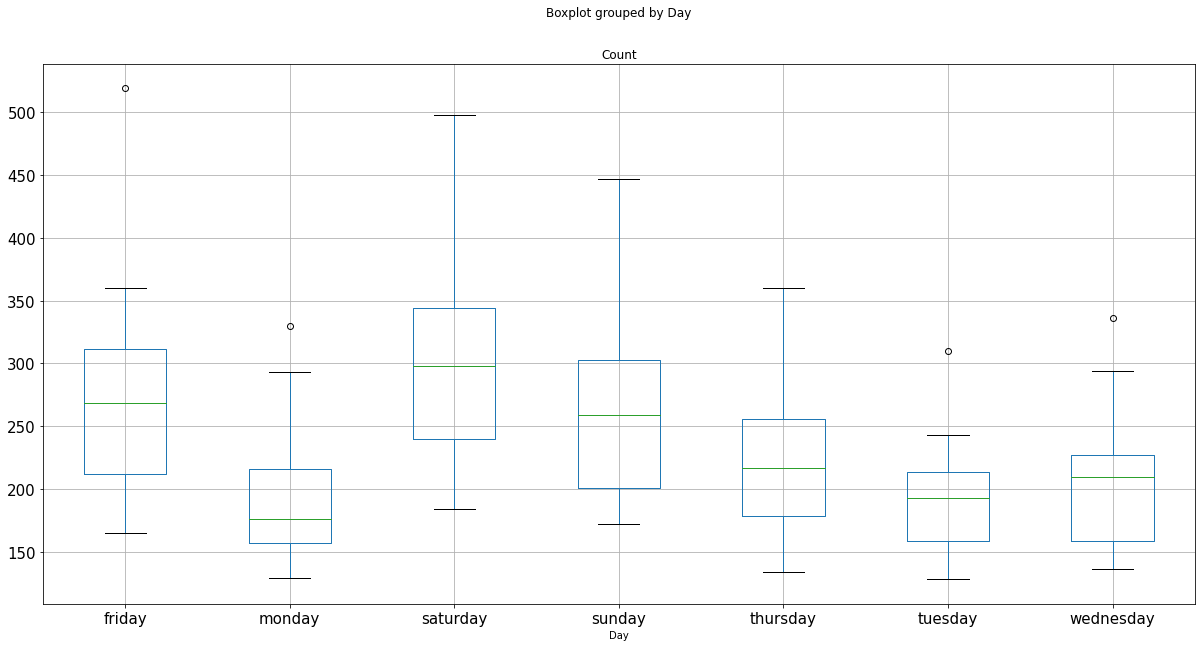

In [85]:
# Create a boxplot to compare means for weekday

weekday_df.boxplot("Count", by="Day", figsize=(20, 10), fontsize = 15);
fig.savefig('day_boxplot.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')



In [69]:
stats.f_oneway(sunday, monday, tuesday, wednesday, thursday, friday, saturday )

F_onewayResult(statistic=array([16.58156839]), pvalue=array([1.02514554e-15]))

Anova indicates there are statistically significant variables in the group. Tukey is used to determine which variables. 

In [86]:
# monday_df = monday[["Monday"]]
# monday_df.insert(0, 'Day', 'monday')
# monday_df = monday_df.rename({"Monday" : "Count"}, axis=1)

# tuesday_df = tuesday[["Tuesday"]]
# tuesday_df.insert(0, 'Day', 'tuesday')
# tuesday_df = tuesday_df.rename({"Tuesday" : "Count"}, axis=1)

# wednesday_df = wednesday[["Wednesday"]]
# wednesday_df.insert(0, 'Day', 'wednesday')
# wednesday_df = wednesday_df.rename({"Wednesday" : "Count"}, axis=1)

# thursday_df = thursday[["Thursday"]]
# thursday_df.insert(0, 'Day', 'thursday')
# thursday_df = thursday_df.rename({"Thursday" : "Count"}, axis=1)

# friday_df = friday[["Friday"]]
# friday_df.insert(0, 'Day', 'friday')
# friday_df = friday_df.rename({"Friday" : "Count"}, axis=1)

# saturday_df = saturday[["Saturday"]]
# saturday_df.insert(0, 'Day', 'saturday')
# saturday_df = saturday_df.rename({"Saturday" : "Count"}, axis=1)

# sunday_df = sunday[["Sunday"]]
# sunday_df.insert(0, 'Day', 'sunday')
# sunday_df = sunday_df.rename({"Sunday" : "Count"}, axis=1)

# weekday_df = monday_df.append([tuesday_df, wednesday_df, thursday_df, friday_df, saturday_df, sunday_df])


In [87]:
tukey = pairwise_tukeyhsd(endog=weekday_df['Count'],
                          groups=weekday_df['Day'],
                          alpha=0.05)

In [88]:
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1    group2   meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
  friday    monday  -78.8125  0.001 -123.3836 -34.2414   True
  friday  saturday   31.6875 0.3475  -12.8836  76.2586  False
  friday    sunday   -6.6875    0.9  -51.2586  37.8836  False
  friday  thursday  -48.7812 0.0219  -93.3524  -4.2101   True
  friday   tuesday  -77.7188  0.001 -122.2899 -33.1476   True
  friday wednesday   -62.375  0.001 -106.9461 -17.8039   True
  monday  saturday     110.5  0.001   65.9289 155.0711   True
  monday    sunday    72.125  0.001   27.5539 116.6961   True
  monday  thursday   30.0312 0.4165  -14.5399  74.6024  False
  monday   tuesday    1.0938    0.9  -43.4774  45.6649  False
  monday wednesday   16.4375    0.9  -28.1336  61.0086  False
saturday    sunday   -38.375 0.1427  -82.9461   6.1961  False
saturday  thursday  -80.4688  0.001 -125.0399 -35.8976   True
saturday

In [89]:
time_of_day_group = main_df.groupby(main_df["Time of Day"])

crash_by_tod = time_of_day_group["Crash ID"].count()
year_dow = year_group["Day of Week"].value_counts()

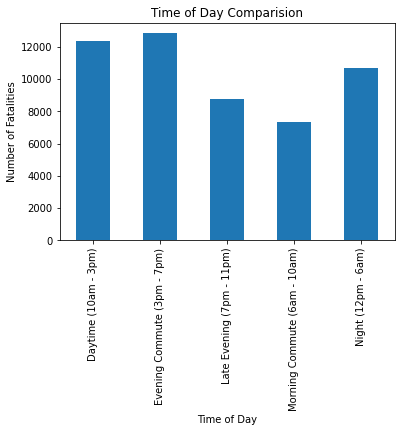

In [114]:
crash_by_tod.plot.bar();
plt.title('Time of Day Comparision')
plt.ylabel('Number of Fatalities')
plt.xlabel("Time of Day")

fig.savefig('time_of_day.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [98]:

year_tod = year_group["Time of Day"].value_counts()

In [99]:
year_tod

Year  Time of Day                 
1989  Evening Commute (3pm - 7pm)     708
      Night (12pm - 6am)              623
      Daytime (10am - 3pm)            554
      Late Evening (7pm - 11pm)       547
      Morning Commute (6am - 10am)    368
                                     ... 
2020  Daytime (10am - 3pm)            301
      Evening Commute (3pm - 7pm)     262
      Night (12pm - 6am)              195
      Late Evening (7pm - 11pm)       185
      Morning Commute (6am - 10am)    150
Name: Time of Day, Length: 160, dtype: int64

In [102]:
#creating time of day dataframe for further analysis
morning_commute = []
daytime = []
evening_commute = []
late_evening = []
night = []

# ***** Need to finish for time of day ******

for i in range(1989,2021):
    morning_commute.append(year_tod[i]["Morning Commute (6am - 10am)"])
    daytime.append(year_tod[i]["Daytime (10am - 3pm)"])
    evening_commute.append(year_tod[i]["Evening Commute (3pm - 7pm)"])
    late_evening.append(year_tod[i]["Late Evening (7pm - 11pm)"])
    night.append(year_tod[i]["Night (12pm - 6am)"])
morning_commute

morning_commute = pd.DataFrame({"Morning Commute": morning_commute})
daytime = pd.DataFrame({"Daytime": daytime})
evening_commute = pd.DataFrame({"Evening Commute": evening_commute})
late_evening = pd.DataFrame({"Late Evening": late_evening})
night = pd.DataFrame({"Night": night})

In [107]:
morning_commute_df = morning_commute[["Morning Commute"]]
morning_commute_df.insert(0, 'Time of Day', 'morning_commute')
morning_commute_df = morning_commute_df.rename({"Morning Commute" : "Count"}, axis=1)

daytime_df = daytime[["Daytime"]]
daytime_df.insert(0, 'Time of Day', 'daytime')
daytime_df = daytime_df.rename({"Daytime" : "Count"}, axis=1)

evening_commute_df = evening_commute[["Evening Commute"]]
evening_commute_df.insert(0, 'Time of Day', 'evening_commute')
evening_commute_df = evening_commute_df.rename({"Evening Commute" : "Count"}, axis=1)

late_evening_df = late_evening[["Late Evening"]]
late_evening_df.insert(0, 'Time of Day', 'late_evening')
late_evening_df = late_evening_df.rename({"Late Evening" : "Count"}, axis=1)
                                                                   
night_df =night[["Night"]]
night_df.insert(0, 'Time of Day', 'night')
night_df = night_df.rename({"Night" : "Count"}, axis=1)



In [108]:
time_of_day_df = morning_commute_df.append([daytime_df, evening_commute_df, late_evening_df, night_df])

In [ ]:
state_group = main_df.groupby(main_df["State"])
crash_by_state = state_group["Crash ID"].count()


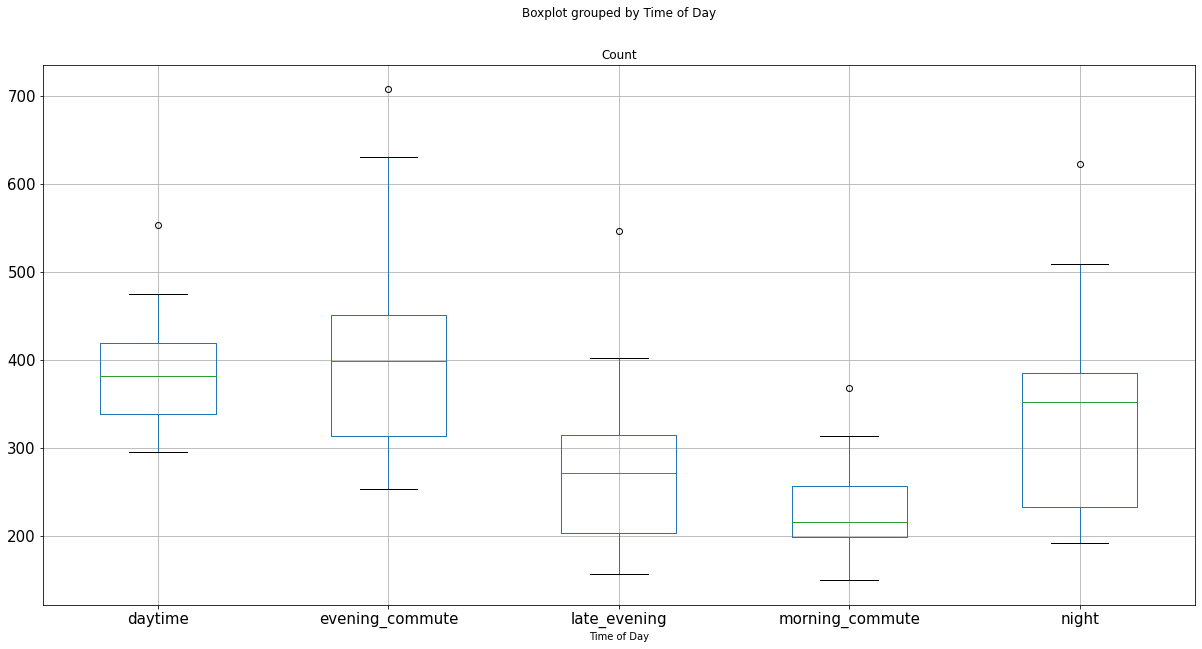

In [110]:
# Create a boxplot to compare means for weekday

time_of_day_df.boxplot("Count", by="Time of Day", figsize=(20, 10), fontsize = 15);
fig.savefig('time_of_day_boxplot.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [111]:
stats.f_oneway(morning_commute, daytime, evening_commute, late_evening, night)

F_onewayResult(statistic=array([24.45814833]), pvalue=array([1.05279211e-15]))

In [112]:
tukey = pairwise_tukeyhsd(endog=time_of_day_df['Count'],
                          groups=time_of_day_df['Time of Day'],
                          alpha=0.05)

In [113]:
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------------
        daytime evening_commute   14.2812    0.9  -43.7403   72.3028  False
        daytime    late_evening -113.1875  0.001 -171.2091  -55.1659   True
        daytime morning_commute   -158.25  0.001 -216.2716 -100.2284   True
        daytime           night  -53.7812 0.0836 -111.8028    4.2403  False
evening_commute    late_evening -127.4688  0.001 -185.4903  -69.4472   True
evening_commute morning_commute -172.5312  0.001 -230.5528 -114.5097   True
evening_commute           night  -68.0625 0.0126 -126.0841  -10.0409   True
   late_evening morning_commute  -45.0625 0.2071 -103.0841   12.9591  False
   late_evening           night   59.4062 0.0419    1.3847  117.4278   True
morning_commute           night  104.4688  0.001   46.4472  162.4903   True
------------

In [121]:
time_of_day_by_day_group = main_df.groupby(["Day of Week", "Time of Day"]).count()

In [124]:
toddoy = time_of_day_by_day_group["Crash ID"]

In [133]:
toddoy["Friday"]

Time of Day
Daytime (10am - 3pm)            1809
Evening Commute (3pm - 7pm)     2123
Late Evening (7pm - 11pm)       1804
Morning Commute (6am - 10am)    1097
Night (12pm - 6am)              1705
Name: Crash ID, dtype: int64

In [137]:
morning_dow = main_df.loc[main_df["Time of Day"] == "Morning Commute (6am - 10am)"].groupby(["Day of Week"])['Crash ID'].count()
daytime_dow = main_df.loc[main_df["Time of Day"] == "Daytime (10am - 3pm)"].groupby(["Day of Week"])['Crash ID'].count()
evening_dow = main_df.loc[main_df["Time of Day"] == "Evening Commute (3pm - 7pm)"].groupby(["Day of Week"])['Crash ID'].count()
late_evening_dow = main_df.loc[main_df["Time of Day"] == "Late Evening (7pm - 11pm)"].groupby(["Day of Week"])['Crash ID'].count()
night_dow = main_df.loc[main_df["Time++++++++++++++++++ of Day"] == "Night (12pm - 6am)"].groupby(["Day of Week"])['Crash ID'].count()

time_by_day_of_week = pd.DataFrame({'Morning Commute': morning_dow , 'Daytime': daytime_dow, 'Evening': evening_dow, 'Late Evening': late_evening_dow, 'Night' : night_dow}).rename_axis(None)


In [138]:
time_by_day_of_week

,Morning Commute,Daytime,Evening,Late Evening,Night
Friday,1097,1809,2123,1804,1705
Monday,1006,1640,1620,894,856
Saturday,1114,2092,1910,1606,2830
Sunday,938,1974,1918,1151,2343
Thursday,1064,1623,1830,1273,1187
Tuesday,983,1626,1723,921,798
Wednesday,1124,1626,1723,1119,950


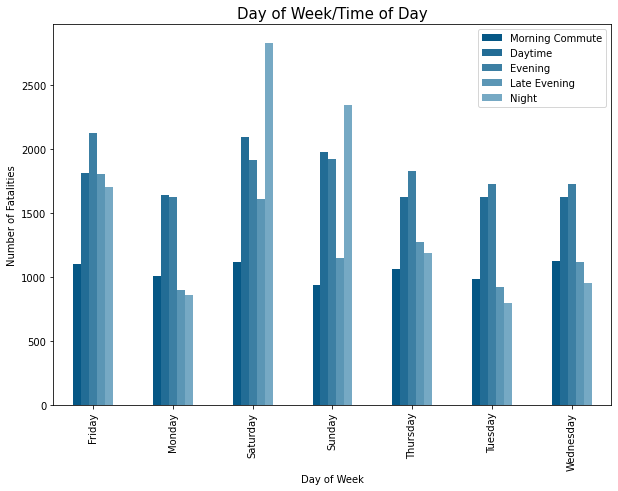

<Figure size 864x576 with 0 Axes>

In [162]:
time_by_day_of_week.plot.bar(figsize = (10,7), color=colors)
plt.title('Day of Week/Time of Day', fontsize = 15)
plt.ylabel('Number of Fatalities')
plt.xlabel('Day of Week')
plt.figure(figsize=(12,8));


Text(0.5, 1.0, 'Heatmap - Day of Week/Time of Day')

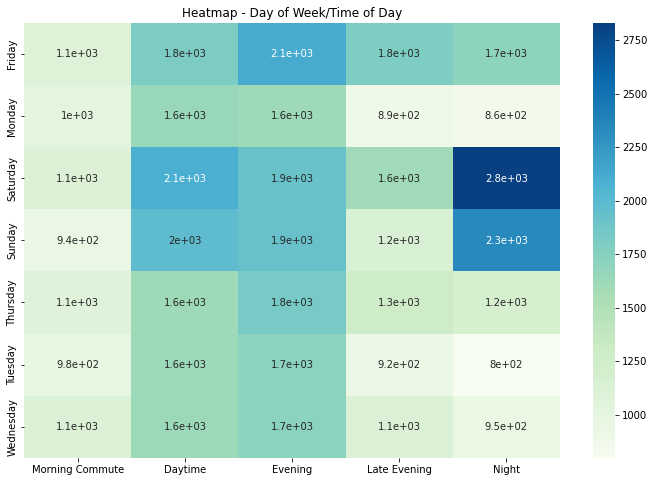

In [149]:
plt.figure(figsize=(12,8))
sns.heatmap(time_by_day_of_week, annot=True, cmap = "GnBu")
plt.title("Heatmap - Day of Week/Time of Day")

0.0